#### Task (class ‘B’):

    Perform task 1.1 considering a second frequency value belonging to a different
    EEG rhythm with respect to the first choice.

#### Importing the routine libraries

In [1]:
import sys
sys.path.insert(0, '../Lib')
from homeworkLib import EEGGraph
import connectivipy as cp
import networkx as nx
import pandas as pd
import pickle
import re

In [2]:
# creating two objects for our analysis
#   EO -> object representing the data recorded during eyes-opened resting state.
#   EC -> object representing the data recorded during eyes-closed resting state.
EO = EEGGraph("../../Data/S003R01.edf")
EC = EEGGraph("../../Data/S003R02.edf")

#Reading in the channel locations
locations = {re.sub('[^\w]',"",x[1][1]):(x[1]['x'], x[1]['y']) for x in pd.read_csv("../../Data/channel_locations.txt", 
                                                                                 sep = "\s+").iterrows()}

### Estimation of the functional brain connectivity using Direct Transfer Function (DTF)

#### Eyes-opened case

In [3]:
dtf_matrix_EO = EO.get_connectivity_matrix_DTF()

#### Eyes-closed case

In [4]:
dtf_matrix_EC = EC.get_connectivity_matrix_DTF()

### Select the frequency value considering a second frequency value belonging to a different EEG rhythm

In [5]:
relevant_frequency = 10

### Apply a threshold to get a binary connectivity matrix with network density equal to 20%

#### Eyes-opened

In [6]:
dtf_bin_adj_matrix_EO, dtf_Graph_EO, threshold1 = EO.get_binary_adjacency_matrix(dtf_matrix_EO, 
                                                                                 relevant_frequency = relevant_frequency,
                                                                                 mvar_estimator = "dtf",
                                                                                 target_density = 20)
print("Threshold used: ", threshold1)
print("Binary connectivity matrix network density: "+str(int(nx.density(dtf_Graph_EO)*100))+"%")

Threshold used:  0.131
Binary connectivity matrix network density: 20%


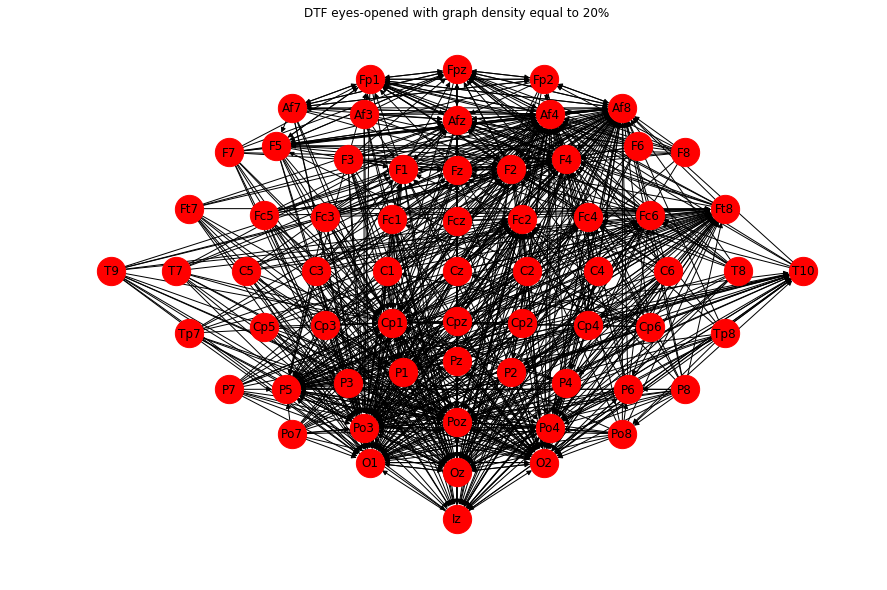

In [7]:
# Create a graphical representation of the binary adjacency matrix
EO.show_graph(dtf_Graph_EO, "DTF eyes-opened with graph density equal to 20%",
              locations,
              saving_path = "../../Images/Q1_6_DTF_eyes_opened", save = True)

##### Eyes-closed

In [8]:
dtf_bin_adj_matrix_EC, dtf_Graph_EC, threshold2 = EC.get_binary_adjacency_matrix(dtf_matrix_EC, 
                                                                                 relevant_frequency = relevant_frequency,
                                                                                 mvar_estimator = "dtf",
                                                                                 target_density = 20)
print("Threshold used: ", threshold2)
print("Binary connectivity matrix network density: "+str(int(nx.density(dtf_Graph_EC)*100))+"%")

Threshold used:  0.13
Binary connectivity matrix network density: 20%


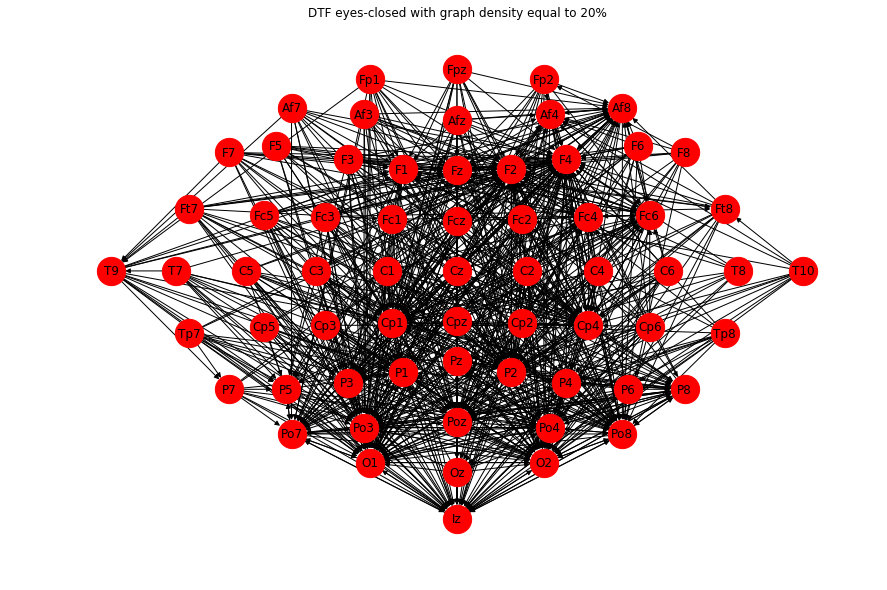

In [9]:
# Create a graphical representation of the binary adjacency matrix
EC.show_graph(dtf_Graph_EC, "DTF eyes-closed with graph density equal to 20%",
              locations,
              saving_path = "../../Images/Q1_6_DTF_eyes_closed", save = True)

In [10]:
# Let's save the classes on the disck in order to resuse them in further questions
with open("../Pickle/EO_16.file", "wb") as f:
    pickle.dump(EO, f, pickle.HIGHEST_PROTOCOL)
f.close()
with open("../Pickle/EC_16.file", "wb") as f:
    pickle.dump(EC, f, pickle.HIGHEST_PROTOCOL)
f.close()